In [51]:
from Bio import SeqIO, Align, AlignIO
from Bio.Seq import Seq
from itertools import combinations, combinations_with_replacement
import numpy as np
import pandas as pd

In [25]:
#
aln = AlignIO.read("C_prot.nr.aln", "fasta")
# aln[0].seq[1:187]

# for record in aln:
#     record.seq = record.seq[1:187]

# AlignIO.write(aln, "HLA-B_aln.fasta", "fasta")

Seq('SHSMKYFFTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPRGEPRAPWVEQE...LEN')

In [ ]:
allele_list = ['A*01:01','A*01:02','A*01:03','A*01:06','A*01:17','A*01:23','A*01:36','A*02:01','A*02:02','A*02:03','A*02:04','A*02:05','A*02:06','A*02:07','A*02:08','A*02:09','A*02:10','A*02:11','A*02:12','A*02:13','A*02:14','A*02:16','A*02:17','A*02:19','A*02:197','A*02:20','A*02:22','A*02:24','A*02:240','A*02:34','A*02:36','A*02:44','A*02:46','A*02:48','A*02:50','A*02:52','A*02:61','A*03:01','A*03:02','A*03:08','A*03:27','A*11:01','A*11:02','A*11:03','A*11:04','A*11:05','A*11:06','A*11:12','A*11:170','A*23:01','A*23:05','A*23:17','A*24:02','A*24:03','A*24:04','A*24:05','A*24:06','A*24:07','A*24:08','A*24:10','A*24:13','A*24:14','A*24:143','A*24:17','A*24:20','A*24:23','A*24:24','A*24:242','A*24:25','A*24:28','A*24:41','A*24:51','A*25:01','A*26:01','A*26:02','A*26:03','A*26:08','A*26:12','A*26:13','A*26:14','A*26:16','A*29:01','A*29:02','A*29:03','A*29:10','A*29:11','A*29:25','A*29:50','A*30:01','A*30:02','A*30:03','A*30:04','A*30:10','A*30:15','A*31:01','A*31:02','A*31:03','A*31:04','A*31:08','A*31:09','A*31:12','A*31:29','A*32:01','A*32:02','A*32:04','A*32:106','A*33:01','A*33:03','A*33:18','A*34:01','A*34:02','A*36:01','A*43:01','A*66:01','A*66:02','A*66:03','A*68:01','A*68:02','A*68:03','A*68:05','A*68:06','A*68:16','A*68:30','A*69:01','A*74:01','A*74:02','A*74:03','A*80:01','B*07:02','B*07:03','B*07:05','B*07:06','B*07:07','B*07:08','B*07:105','B*07:35','B*07:75','B*07:91','B*07:96','B*08:01','B*08:03','B*08:04','B*08:05','B*13:01','B*13:02','B*13:04','B*13:38','B*14:01','B*14:02','B*14:03','B*14:04','B*14:05','B*14:06','B*14:11','B*15:01','B*15:02','B*15:03','B*15:04','B*15:05','B*15:06','B*15:07','B*15:08','B*15:09','B*15:10','B*15:11','B*15:12','B*15:13','B*15:15','B*15:16','B*15:17','B*15:18','B*15:20','B*15:21','B*15:23','B*15:24','B*15:25','B*15:27','B*15:29','B*15:30','B*15:31','B*15:32','B*15:34','B*15:35','B*15:36','B*15:37','B*15:39','B*15:46','B*15:58','B*15:67','B*15:93','B*18:01','B*18:02','B*18:03','B*18:04','B*18:05','B*18:06','B*18:07','B*18:09','B*27:01','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:08','B*27:14','B*35:01','B*35:02','B*35:03','B*35:04','B*35:05','B*35:06','B*35:08','B*35:09','B*35:10','B*35:12','B*35:13','B*35:14','B*35:15','B*35:16','B*35:17','B*35:18','B*35:19','B*35:20','B*35:21','B*35:23','B*35:24','B*35:25','B*35:27','B*35:28','B*35:29','B*35:32','B*35:36','B*35:43','B*35:44','B*35:61','B*35:68','B*35:77','B*37:01','B*38:01','B*38:02','B*38:09','B*39:01','B*39:02','B*39:03','B*39:04','B*39:05','B*39:06','B*39:07','B*39:08','B*39:09','B*39:10','B*39:11','B*39:12','B*39:20','B*39:24','B*39:54','B*40:01','B*40:02','B*40:03','B*40:04','B*40:05','B*40:06','B*40:07','B*40:08','B*40:09','B*40:10','B*40:11','B*40:12','B*40:121','B*40:14','B*40:15','B*40:16','B*40:23','B*40:268','B*40:36','B*40:38','B*40:46','B*40:49','B*41:01','B*41:02','B*41:03','B*41:23','B*42:01','B*42:02','B*42:18','B*44:02','B*44:03','B*44:04','B*44:05','B*44:06','B*44:07','B*44:08','B*44:09','B*44:10','B*44:15','B*44:151','B*44:27','B*44:29','B*45:01','B*46:01','B*47:01','B*47:03','B*48:01','B*48:02','B*48:03','B*48:04','B*48:07','B*49:01','B*50:01','B*50:02','B*50:04','B*51:01','B*51:02','B*51:03','B*51:04','B*51:05','B*51:06','B*51:07','B*51:08','B*51:10','B*51:12','B*51:14','B*51:15','B*51:19','B*51:33','B*51:61','B*51:76','B*52:01','B*53:01','B*53:03','B*53:05','B*54:01','B*54:18','B*55:01','B*55:02','B*55:03','B*55:04','B*55:15','B*56:01','B*56:02','B*56:03','B*56:04','B*56:05','B*56:43','B*57:01','B*57:02','B*57:03','B*57:04','B*57:05','B*57:25','B*58:01','B*58:02','B*58:06','B*59:01','B*67:01','B*73:01','B*78:01','B*78:03','B*81:01','B*82:01','B*82:02','C*01:02','C*01:03','C*01:04','C*01:06','C*01:44','C*01:57','C*02:02','C*02:03','C*02:09','C*02:10','C*03:02','C*03:03','C*03:04','C*03:05','C*03:06','C*03:07','C*03:09','C*03:135','C*03:15','C*03:16','C*03:19','C*04:01','C*04:03','C*04:04','C*04:06','C*04:07','C*04:10','C*04:15','C*04:43','C*05:01','C*05:09','C*06:02','C*06:03','C*06:04','C*06:06','C*07:01','C*07:02','C*07:03','C*07:04','C*07:05','C*07:06','C*07:07','C*07:08','C*07:10','C*07:14','C*07:17','C*07:172','C*07:18','C*07:19','C*07:248','C*07:26','C*07:27','C*07:270','C*07:31','C*08:01','C*08:02','C*08:03','C*08:04','C*08:06','C*08:13','C*08:72','C*12:02','C*12:03','C*12:04','C*12:05','C*12:07','C*14:02','C*14:03','C*14:04','C*14:06','C*15:02','C*15:03','C*15:04','C*15:05','C*15:07','C*15:08','C*15:09','C*15:10','C*15:13','C*16:01','C*16:02','C*16:04','C*17:01','C*17:03','C*18:01','C*18:02']
outlist = []
for record in SeqIO.parse("C_prot.fasta", "fasta"):
    allele = ':'.join(record.description.split()[1].split(":",2)[:2])
    # print(allele)
    if allele in allele_list:
        record.id = allele.replace('*','').replace(':','_')
        # record.description = allele
        outlist.append(record)
        allele_list.remove(allele)

print(allele_list)
# print(outlist)
# SeqIO.write(outlist, "pop_HLA-C.faa", "fasta")

In [26]:
allele_list = ['A*01:01','A*01:02','A*01:03','A*01:06','A*01:17','A*01:23','A*01:36','A*02:01','A*02:02','A*02:03','A*02:04','A*02:05','A*02:06','A*02:07','A*02:08','A*02:09','A*02:10','A*02:11','A*02:12','A*02:13','A*02:14','A*02:16','A*02:17','A*02:19','A*02:197','A*02:20','A*02:22','A*02:24','A*02:240','A*02:34','A*02:36','A*02:44','A*02:46','A*02:48','A*02:50','A*02:52','A*02:61','A*03:01','A*03:02','A*03:08','A*03:27','A*11:01','A*11:02','A*11:03','A*11:04','A*11:05','A*11:06','A*11:12','A*11:170','A*23:01','A*23:05','A*23:17','A*24:02','A*24:03','A*24:04','A*24:05','A*24:06','A*24:07','A*24:08','A*24:10','A*24:13','A*24:14','A*24:143','A*24:17','A*24:20','A*24:23','A*24:24','A*24:242','A*24:25','A*24:28','A*24:41','A*24:51','A*25:01','A*26:01','A*26:02','A*26:03','A*26:08','A*26:12','A*26:13','A*26:14','A*26:16','A*29:01','A*29:02','A*29:03','A*29:10','A*29:11','A*29:25','A*29:50','A*30:01','A*30:02','A*30:03','A*30:04','A*30:10','A*30:15','A*31:01','A*31:02','A*31:03','A*31:04','A*31:08','A*31:09','A*31:12','A*31:29','A*32:01','A*32:02','A*32:04','A*32:106','A*33:01','A*33:03','A*33:18','A*34:01','A*34:02','A*36:01','A*43:01','A*66:01','A*66:02','A*66:03','A*68:01','A*68:02','A*68:03','A*68:05','A*68:06','A*68:16','A*68:30','A*69:01','A*74:01','A*74:02','A*74:03','A*80:01','B*07:02','B*07:03','B*07:05','B*07:06','B*07:07','B*07:08','B*07:105','B*07:35','B*07:75','B*07:91','B*07:96','B*08:01','B*08:03','B*08:04','B*08:05','B*13:01','B*13:02','B*13:04','B*13:38','B*14:01','B*14:02','B*14:03','B*14:04','B*14:05','B*14:06','B*14:11','B*15:01','B*15:02','B*15:03','B*15:04','B*15:05','B*15:06','B*15:07','B*15:08','B*15:09','B*15:10','B*15:11','B*15:12','B*15:13','B*15:15','B*15:16','B*15:17','B*15:18','B*15:20','B*15:21','B*15:23','B*15:24','B*15:25','B*15:27','B*15:29','B*15:30','B*15:31','B*15:32','B*15:34','B*15:35','B*15:36','B*15:37','B*15:39','B*15:46','B*15:58','B*15:67','B*15:93','B*18:01','B*18:02','B*18:03','B*18:04','B*18:05','B*18:06','B*18:07','B*18:09','B*27:01','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:08','B*27:14','B*35:01','B*35:02','B*35:03','B*35:04','B*35:05','B*35:06','B*35:08','B*35:09','B*35:10','B*35:12','B*35:13','B*35:14','B*35:15','B*35:16','B*35:17','B*35:18','B*35:19','B*35:20','B*35:21','B*35:23','B*35:24','B*35:25','B*35:27','B*35:28','B*35:29','B*35:32','B*35:36','B*35:43','B*35:44','B*35:61','B*35:68','B*35:77','B*37:01','B*38:01','B*38:02','B*38:09','B*39:01','B*39:02','B*39:03','B*39:04','B*39:05','B*39:06','B*39:07','B*39:08','B*39:09','B*39:10','B*39:11','B*39:12','B*39:20','B*39:24','B*39:54','B*40:01','B*40:02','B*40:03','B*40:04','B*40:05','B*40:06','B*40:07','B*40:08','B*40:09','B*40:10','B*40:11','B*40:12','B*40:121','B*40:14','B*40:15','B*40:16','B*40:23','B*40:268','B*40:36','B*40:38','B*40:46','B*40:49','B*41:01','B*41:02','B*41:03','B*41:23','B*42:01','B*42:02','B*42:18','B*44:02','B*44:03','B*44:04','B*44:05','B*44:06','B*44:07','B*44:08','B*44:09','B*44:10','B*44:15','B*44:151','B*44:27','B*44:29','B*45:01','B*46:01','B*47:01','B*47:03','B*48:01','B*48:02','B*48:03','B*48:04','B*48:07','B*49:01','B*50:01','B*50:02','B*50:04','B*51:01','B*51:02','B*51:03','B*51:04','B*51:05','B*51:06','B*51:07','B*51:08','B*51:10','B*51:12','B*51:14','B*51:15','B*51:19','B*51:33','B*51:61','B*51:76','B*52:01','B*53:01','B*53:03','B*53:05','B*54:01','B*54:18','B*55:01','B*55:02','B*55:03','B*55:04','B*55:15','B*56:01','B*56:02','B*56:03','B*56:04','B*56:05','B*56:43','B*57:01','B*57:02','B*57:03','B*57:04','B*57:05','B*57:25','B*58:01','B*58:02','B*58:06','B*59:01','B*67:01','B*73:01','B*78:01','B*78:03','B*81:01','B*82:01','B*82:02','C*01:02','C*01:03','C*01:04','C*01:06','C*01:44','C*01:57','C*02:02','C*02:03','C*02:09','C*02:10','C*03:02','C*03:03','C*03:04','C*03:05','C*03:06','C*03:07','C*03:09','C*03:135','C*03:15','C*03:16','C*03:19','C*04:01','C*04:03','C*04:04','C*04:06','C*04:07','C*04:10','C*04:15','C*04:43','C*05:01','C*05:09','C*06:02','C*06:03','C*06:04','C*06:06','C*07:01','C*07:02','C*07:03','C*07:04','C*07:05','C*07:06','C*07:07','C*07:08','C*07:10','C*07:14','C*07:17','C*07:172','C*07:18','C*07:19','C*07:248','C*07:26','C*07:27','C*07:270','C*07:31','C*08:01','C*08:02','C*08:03','C*08:04','C*08:06','C*08:13','C*08:72','C*12:02','C*12:03','C*12:04','C*12:05','C*12:07','C*14:02','C*14:03','C*14:04','C*14:06','C*15:02','C*15:03','C*15:04','C*15:05','C*15:07','C*15:08','C*15:09','C*15:10','C*15:13','C*16:01','C*16:02','C*16:04','C*17:01','C*17:03','C*18:01','C*18:02']
outlist = []
for record in SeqIO.parse("HLA_aln.fasta", "fasta"):
    # allele = ':'.join(record.description.split()[1].split(":",2)[:2])
    allele = record.id
    # print(allele)
    if allele in allele_list:
        record.id = allele.replace('*','').replace(':','_')
        # record.description = allele
        outlist.append(record)
        allele_list.remove(allele)

print(allele_list)
# print(outlist)
SeqIO.write(outlist, "pop_HLA.faa", "fasta")

['A*11:170']


448

In [56]:
def calc_mat(InFile):
    allele_dict = SeqIO.to_dict(SeqIO.parse(InFile, "fasta"))

    # AlleleComb_wi = combinations_with_replacement(DATList, 2)
    allele_list = list(allele_dict.keys())
    AlleleComb_wo = combinations(allele_list, 2)
    DistMat = pd.DataFrame(np.zeros((len(allele_list), len(allele_list))), index=allele_list, columns=allele_list)
    # print(AlleleComb_wo)

    aligner = Align.PairwiseAligner()
    aligner.substitution_matrix = Align.substitution_matrices.load("BLOSUM62")

    for comb in AlleleComb_wo:
        DistMat.loc[comb[1],comb[0]] = np.reciprocal(aligner.score(allele_dict[comb[1]].seq, allele_dict[comb[0]].seq)*0.01)
    DistMat = DistMat.add(DistMat.T, fill_value=0)

    return DistMat

In [52]:
contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171]
content = SeqIO.parse("pop_HLA.faa", "fasta")
out_list =[]
for record in content:
    # record.seq = record.seq[0]
    record.seq = Seq(''.join([record.seq[i-2] for i in contact])) # the sequence starts from position 2, plus the python is 0 based
    out_list.append(record)

SeqIO.write(out_list, "pop_HLA_pseudo.faa", "fasta")

448

In [37]:
import matplotlib.pyplot as plt
import seaborn as sn

def heatmap(Mat, order=None, size=(10,10), label=False, line=False):
    plt.figure(figsize=size)
    # MatNormed = (Mat - Mat.mean())/(Mat.std())
    g = sn.heatmap(Mat, square=True, xticklabels=True, yticklabels=True, cbar_kws={"shrink": .8})
    g.axes.tick_params(axis='both', labelsize=8, pad=40)
    if label:
        g.axes.set_xticklabels(labels=label,va='bottom',ha='center')
        g.axes.set_yticklabels(labels=label,va='center',ha='left')

    else:
        g.axes.set_xticklabels(labels=g.axes.get_xticklabels(),va='bottom',ha='center')
        g.axes.set_yticklabels(labels=g.axes.get_yticklabels(),va='center',ha='left')

    # seperate lines between
    if line:
        split = np.cumsum([len(sublist) for sublist in order])
        # print(split)
        for line in split[:-1]:
            plt.axhline(y=line, color='k', linestyle='-')
            plt.axvline(x=line, color='k', linestyle='-')
    plt.show()
    
    return

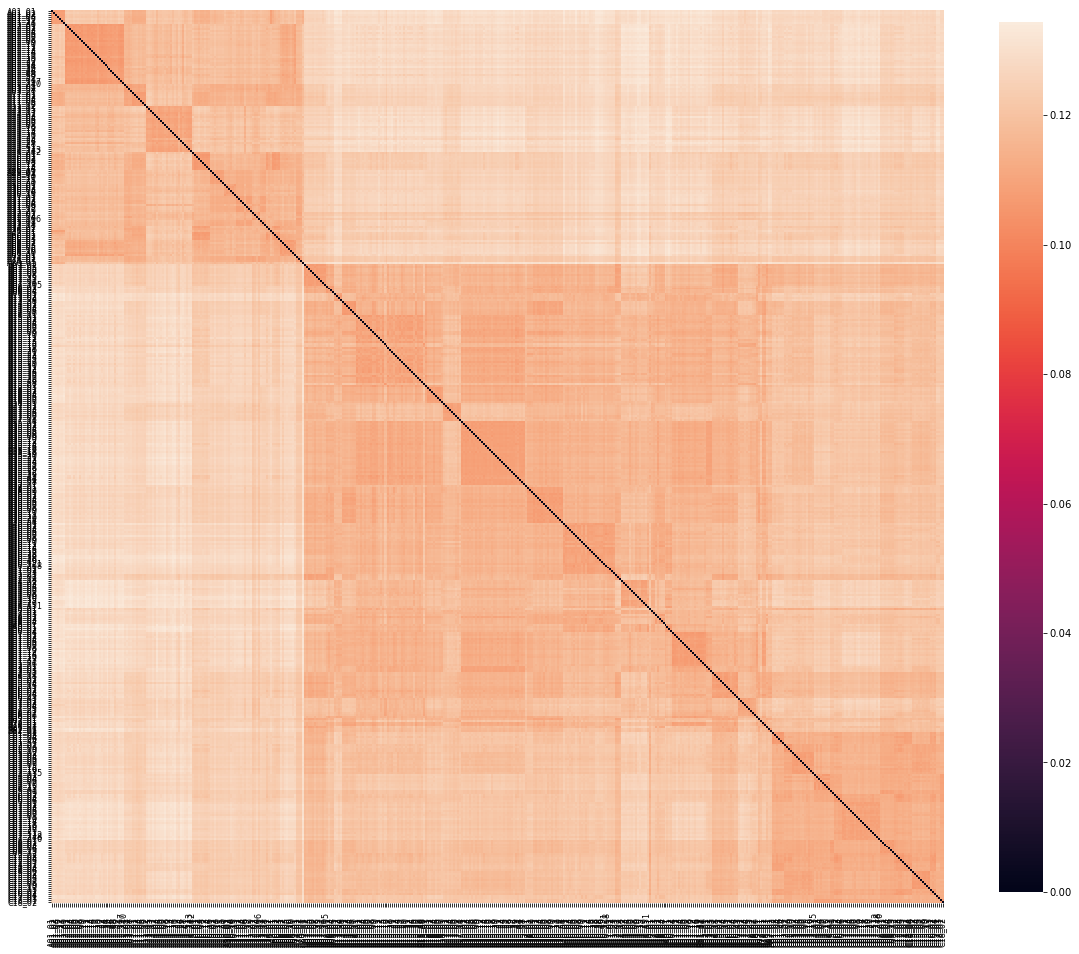

In [57]:
DistMat = calc_mat("pop_HLA.faa")
heatmap(DistMat, size=(20,20))

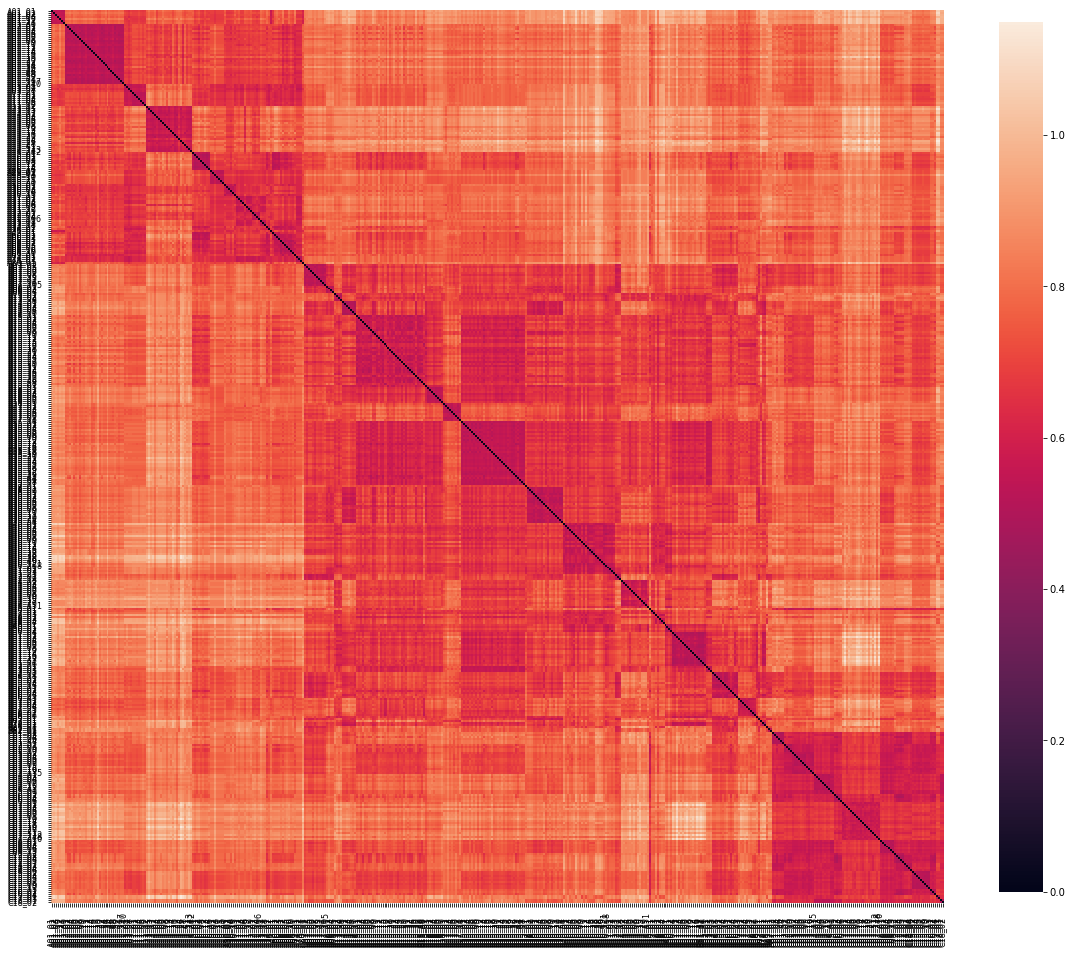

In [58]:
DistMat = calc_mat("pop_HLA_pseudo.faa")
heatmap(DistMat, size=(20,20))